# INFERENCIA ESTADÍSTICA

Por lo general, contamos con recursos limitados (ya sea tiempo o dinero). Estas limitaciones no permiten que un censo se realice con frecuencia; por lo tanto, requerimos de trabajar con una muestra y calcular los parámetros poblacionales a partir de la misma.

## Estimación de Parámetros. Estimadores

Los parámetros a estimar, básicamente, son dos: media y varianza.

Si la muestra es representativa, la media y la varianza poblacionales corresponderán a la media y varianza muestrales. Por lo que los valores encontrados corresponderán a una probabilidad.

La función de la media poblacional es:

$$
{\large
\mu = \frac{\sum_{i=1}^{N} X_{i}}{N}
}
$$

y la muestral es:

$$
{\large
\overline{x} = \frac{\sum_{i=1}^{n} x_{i}}{n}
}
$$

Básicamente, se calculan de la misma manera.

Cuando se calcula la varianza, sí se observa una diferencia sustancial:

Varianza Poblacional:

$$
{\large
\sigma^{2} = \frac{\sum_{i=1}^{N} \left( X_{i} - \mu \right)^{2}}{N}
}
$$

Varianza Muestral

$$
{\large
S^{2} = \frac{\sum_{i=1}^{n} \left( x_{i} - \overline{x} \right)^{2}}{n-1}
}
$$

### Ejemplo

Vamos a continuar con el ejemplo de las edades de los estudiantes. Como ya conocemos la población, vamos a usarlo como referencia para comprobar la precisión:

In [0]:
load(url('https://www.dropbox.com/s/h652szo4gfkhq7k/estudiantes.RData?dl=1'))

In [2]:
edades<-poblacion[,c(2,5,15)]
head(edades)

,SEXO_BIOLOGICO,EDAD,FACULTAD
,<fct>,<int>,<fct>
1,HOMBRE,30,CIENCIAS
2,HOMBRE,26,CIENCIAS
3,HOMBRE,30,CIENCIAS
4,HOMBRE,28,CIENCIAS
5,MUJER,28,CIENCIAS
6,MUJER,28,CIENCIAS


In [3]:
summary(edades)

 SEXO_BIOLOGICO      EDAD              FACULTAD   
 HOMBRE:13275   Min.   :16   C. HUMANAS    :4115  
 MUJER :10765   1st Qu.:19   CEDEDUIS      :  19  
                Median :22   CIENCIAS      :1661  
                Mean   :23   F.MEC\xc1NICAS:8982  
                3rd Qu.:24   F.QU\xcdMICAS :4259  
                Max.   :85   IPRED         :3129  
                             SALUD         :1875  

In [5]:
install.packages('samplingbook')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lpSolve’, ‘minqa’, ‘numDeriv’, ‘mitools’, ‘pps’, ‘sampling’, ‘survey’




In [6]:
library(samplingbook) # Para calcular el tamaño de la muestra

Loading required package: pps

Loading required package: sampling

Loading required package: survey

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survival’


The following objects are masked from ‘package:sampling’:

    cluster, strata



Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart




In [7]:
tamaño<-sample.size.prop(e=0.05, P = 0.5, N = length(edades$EDAD), level = 0.95)$n # Vamos a usar P = 0.5
muestra<-sample(1:length(edades$EDAD), size = tamaño, replace = FALSE) # Diseñamos un M.A.S.
mas.edades<-edades[muestra,] # Tenemos la muestra
head(mas.edades)

Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“in

,SEXO_BIOLOGICO,EDAD,FACULTAD
,<fct>,<int>,<fct>
836,MUJER,28,F.MECNICAS
4803,HOMBRE,23,F.MECNICAS
9587,MUJER,25,F.QUMICAS
14997,HOMBRE,23,F.QUMICAS
7362,MUJER,20,F.MECNICAS
7731,HOMBRE,18,F.MECNICAS


Ya lo hicimos en el módulo de muestreo, pero, vamos a calcular por separado los parámetros:

In [8]:
# Media Poblacional
round(mean(edades$EDAD),1)

[1] 23

In [9]:
# Media Muestral
round(mean(mas.edades$EDAD),1)

[1] 22.8

Ahora, calculemos la varianza. Tengamos en cuenta que estos parámetros no son equivalentes:

$$
\frac{\sum_{i=1}^{N} \left( X_{i} - \mu \right)^{2}}{N} \not\equiv \frac{\sum_{i=1}^{n} \left( x_{i} - \overline{x} \right)^{2}}{n-1}
$$

Debemos tener en cuenta que las funciones de los paquetes estadísticos, por defecto, calculan la varianza muestral; por lo tanto, debemos hacer la respectiva corrección $\left(N-1\right) / N$

In [10]:
N<-length(edades$EDAD) # El tamaño de la población
round(var(edades$EDAD),3) # Varianza sin corrección

[1] 32.795

In [11]:
round(var(edades$EDAD)*((N-1)/N),3) # Varianza Corregida

[1] 32.793

También podemos usar una función específica `popvar` de la librería `rafalib`:

In [12]:
install.packages('rafalib')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
library(rafalib)
round(popvar(edades$EDAD),3)

[1] 32.793

In [14]:
round((sqrt(popvar(edades$EDAD))),2)

[1] 5.73

In [15]:
round(sd(edades$EDAD),2)

[1] 5.73

In [16]:
N

[1] 24040

Para la varianza muestral no requerimos ajustes:

In [17]:
round(var(mas.edades$EDAD),3)

[1] 31.607

## Estimación por Máxima Verosimilitud

Consideremos los siguiente: $x_{1}, x_{2}, \dots, x_{n}$ corresponde a una m.a.s. de una población $X$ con una distribución de probabilidad $f(x|\theta)$ siendo $\theta$ un parámetro desconocido. Entonces, la función de verosimilitud se define como:


$${\Large
L(\theta) = f \left(x_{1}, x_{2}, \dots, x_{n}|\theta\right)
}$$


Como cada $x_{i}$ corresponde a una realización de la v.a. $X_{i}$ y son independientes e identicamente distribuidas (_idd_) la función de verosimilitud se escribe:

$$
{\large
L(\theta) = \prod_{i=1}^{n}f(x_{i}|\theta)
}
$$

La teoría nos indica que para encontrar el estimador máximo verosímil (_EMV_) para el parámetro poblacional desconocido $\theta$, debemos resolver el siguiente problema de maximización:

$$
{\large
\underset{\widehat{\theta}}{max} \; L(\theta) \text{ o bien } \underset{\widehat{\theta}}{max}\; ln\, L(\theta)
}
$$

Computacionalmente, el problema consiste en minimizar el negativo de la función de log-verisimilitud ya que $max\;Z = min\;(-Z)$ siendo $Z$ una función cualquiera. Entonces, se tiene:

$$
{\large
- ln\, L(\theta) = - ln \prod_{i=1}^{n} f\left( x_{i}|\theta\right) = - \sum_{i=1}^{n} ln\, f\left( x_{i}|\theta\right)
}
$$

## Ejemplo

Sigamos con el ejemplo de las edades y estimemos por _MV_ los parámetros.

Podemos usar dos funciones (no necesariamente ambas) `mle` y `mle2`. Cabe la posibildad que alguna librería no se encuentre actualizada

Primero, necesitamos instalar algunos paquetes:

In [18]:
install.packages("bbmle")
install.packages("stats4")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bdsmatrix’, ‘mvtnorm’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats4’ is not available (for R version 3.6.3)”
Warning message:
“package ‘stats4’ is a base package, and should not be updated”


In [0]:
library(stats4) # para la función mle
library(bbmle) # para la función mle2

Ahora construimos el negativo de la función de log-verosimilitud. Esta función, llamada `NegLogLik` en este caso, depende de los parámetros poblacionales desconocidos media y desviación estándar, $\mu$ y $\sigma$ respectivamente:

In [0]:
x<-edades$EDAD # Para trabajar con los datos muestrales que requerimos
NegLogLik = function(mu,sigma){-sum(dnorm(x,mu,sigma,log = TRUE))}

Los parámetros muestrales para hacer las estimaciones

In [0]:
m.mu<-mean(mas.edades$EDAD) # Media
m.sigma<-sd(mas.edades$EDAD) # Desviación Estándar

Construimos los estimadores. El argumento `star=list()` es para ingresar los valores iniciales con los cuales R construirá numéricamente una aproximación de la Matriz Hessiana asociada al problema de optimización

In [22]:
EMV1 = mle(NegLogLik, start = list(mu=m.mu, sigma=m.sigma))
summary(EMV1) # Para visualizar los valores

Warning message in dnorm(x, mu, sigma, log = TRUE):
“NaNs produced”
Warning message in dnorm(x, mu, sigma, log = TRUE):
“NaNs produced”


Maximum likelihood estimation

Call:
mle(minuslogl = NegLogLik, start = list(mu = m.mu, sigma = m.sigma))

Coefficients:
       Estimate Std. Error
mu    22.997165 0.03693393
sigma  5.726546 0.02611627

-2 log L: 152127.5 

In [0]:
EMV2 = mle2(NegLogLik,start = list(mu=m.mu,sigma=m.sigma), data = list(x)) # La otra función
summary(EMV2)

Maximum likelihood estimation

Call:
mle2(minuslogl = NegLogLik, start = list(mu = m.mu, sigma = m.sigma), 
    data = list(x))

Coefficients:
       Estimate Std. Error z value     Pr(z)    
mu    22.997173   0.036934  622.66 < 2.2e-16 ***
sigma  5.726529   0.026116  219.27 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

-2 log L: 152127.5 

## Intervalos de Confianza

El intervalo de confianza describe la variabilidad entre la medida obtenida en un estudio y la medida real de la población (el valor real). Corresponde a un rango de valores, cuya distribución es normal y en el cual se encuentra, con alta probabilidad, el valor real de una determinada variable.

Se trata de un par de números (o varios pares de números) dentro de los cuales se estima se encuentra un parámetro desconocido $\theta$.

Cuando la varianza $\sigma^{2}$ es conocida, el intervalo de confianza corresponde a:

$$
{\large
I.C \rightarrow \mu \in \overline{x} \pm Z_{(1-\alpha)} \frac{S_{x}}{\sqrt{n}}
}
$$

Donde

* $1-\alpha$ es el nivel de confianza deseado
* $Z_{1-\alpha}$ es el valor de la distribución normal estándar que corresponde al nivel de confianza deseado.
* $\frac{S_{x}}{\sqrt{n}}$ es el error estándar de la media

Los niveles de confianza más comunes son:

* 0.90 o 90% $\rightarrow Z = 1.64$
* 0.95 o 95% $\rightarrow Z = 1.96$
* 0.99 o 99% $\rightarrow Z = 2.57$

In [23]:
install.packages('RcmdrMisc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘png’, ‘jpeg’, ‘checkmate’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘zoo’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’, ‘car’, ‘sandwich’, ‘abind’, ‘Hmisc’, ‘e1071’, ‘readstata13’, ‘nortest’


Warning message in install.packages("RcmdrMisc"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("RcmdrMisc"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("RcmdrMisc"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("RcmdrMisc"):
“installation of package ‘RcmdrMisc’ had non-zero exit status”


In [0]:
# La gráfica de la distribución normal estándar
library(RcmdrMisc)

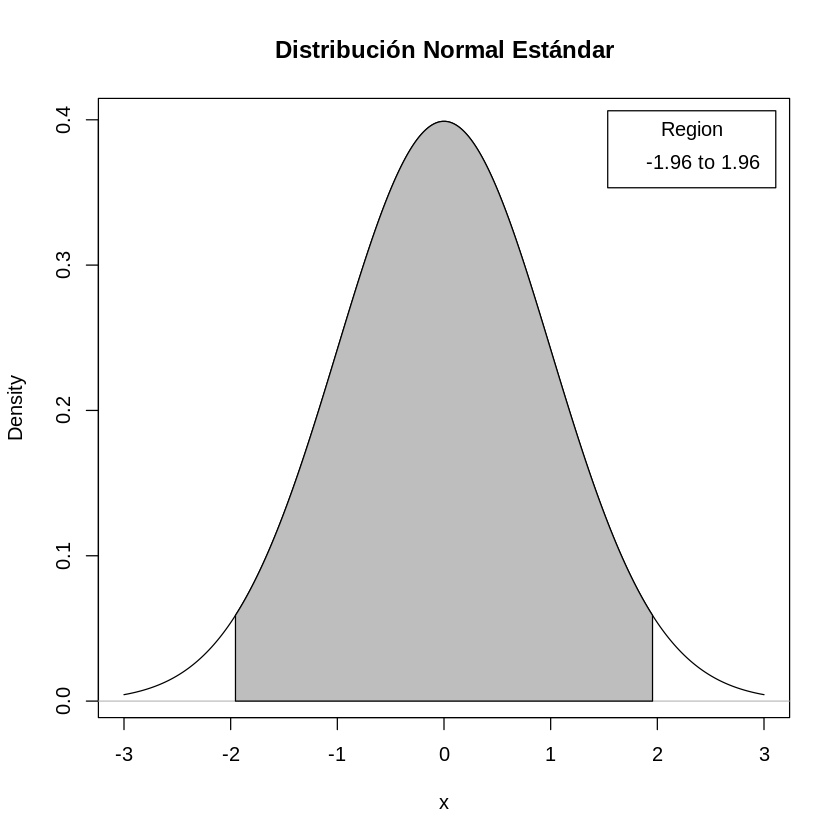

In [0]:
x <- seq(-3, 3, length.out=1000)  
plotDistr(x, dnorm(x, mean=0, sd=1), cdf=FALSE, xlab="x", ylab="Density", main=paste("Distribución Normal Estándar"), 
  regions=list(c(-1.96, 1.96)), col=c('#BEBEBE', '#BEBEBE'), legend.pos='topright')

Sigamos con el ejemplo de las edades de los estudiantes:

In [0]:
# Primero los descriptivos básicos:
summary(mas.edades$EDAD)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   19.00   22.00   22.88   24.00   55.00 

In [0]:
round(sd(mas.edades$EDAD),2)

[1] 5.34

Ahora, calculemos el intervalo:

In [0]:
media <- mean(na.omit(mas.edades$EDAD)) # Pedimos la media
desv <- sd(na.omit(mas.edades$EDAD)) # La desviación estándar
N <- length(na.omit(mas.edades$EDAD)) # El tamaño válido de la muestra
error.est <- desv/sqrt(N) # Calculamos el error estándar
error <- 2*error.est # Fijamos Z=2 para indicar un nivel de confianza de 95%
lim.inf <- media-error # Límite inferior del intervalo
lim.sup <- media+error # Límite superior del intervalo

In [0]:
# Guardamos todos los datos generados en un objeto data frame
resultado1 <- data.frame(media, desv, N, error.est, error, lim.inf, lim.sup)
round(resultado1,2)

media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22.88,5.34,379,0.27,0.55,22.33,23.43


Otra forma de estimar el intervalo de confianza es mediante la función `z.test` de la librería `TeachingDemos` que, a la vez, nos sirve para determinar si el valor de la media es el correcto:

In [0]:
install.packages('TeachingDemos')

In [0]:
library(TeachingDemos) # Para usar la función z.test()

In [0]:
args(z.test)

function (x, mu = 0, stdev, alternative = c("two.sided", "less", 
    "greater"), sd = stdev, n = length(x), conf.level = 0.95, 
    ...) 
NULL

In [0]:
z.test(mas.edades$EDAD, stdev = sd(mas.edades$EDAD), mu = mean(mas.edades$EDAD))


	One Sample z-test

data:  mas.edades$EDAD
z = 0, n = 379.00000, Std. Dev. = 5.34483, Std. Dev. of the sample mean
= 0.27455, p-value = 1
alternative hypothesis: true mean is not equal to 22.87863
95 percent confidence interval:
 22.34053 23.41673
sample estimates:
mean of mas.edades$EDAD 
               22.87863 


In [0]:
z.test(mas.edades$EDAD, stdev = sd(mas.edades$EDAD), mu = mean(mas.edades$EDAD), conf.level = 0.99)


	One Sample z-test

data:  mas.edades$EDAD
z = 0, n = 379.00000, Std. Dev. = 5.34483, Std. Dev. of the sample mean
= 0.27455, p-value = 1
alternative hypothesis: true mean is not equal to 22.87863
99 percent confidence interval:
 22.17145 23.58581
sample estimates:
mean of mas.edades$EDAD 
               22.87863 


Un parámetro que, por lo general, se desconoce es la varianza. Cuando esto ocurre, no se emplea la distribucion _Z_ sino la distribución _t-student_:

$$
I.C \rightarrow \mu \in \overline{x} \pm t \frac{S_{x}}{\sqrt{n}}
$$

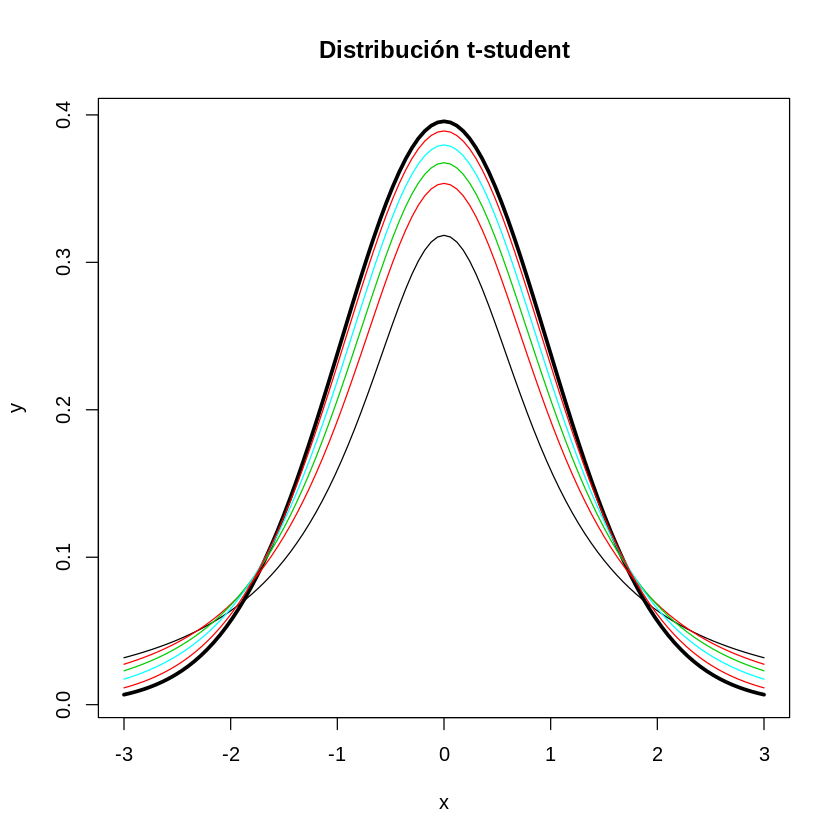

In [0]:
# La Gráfica de la distribución t-student:
curve(dt(x, df = 30), from = -3, to = 3, lwd = 3, ylab = "y", main = "Distribución t-student")
ind <- c(1, 2, 3, 5, 10)
for (i in ind) curve(dt(x, df = i), -3, 3, add = TRUE,col=i)

In [0]:
media <- mean(na.omit(mas.edades$EDAD))
desv <- sd(na.omit(mas.edades$EDAD))
N <- length(na.omit(mas.edades$EDAD))
error.est <- desv/sqrt(N)
error <- qt(0.975, df= N-1) * error.est # Usar el cuantil 0.975 de t
lim.inf <- media-error
lim.sup <- media+error

In [0]:
resultado2 <- data.frame(media, desv, N, error.est, error, lim.inf, lim.sup)
resultado2

media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
22.87863,5.344833,379,0.2745456,0.539828,22.3388,23.41846


O usando la función `t.test`:

In [0]:
t.test(mas.edades$EDAD, mu = mean(edades$EDAD))


	One Sample t-test

data:  mas.edades$EDAD
t = -0.43178, df = 378, p-value = 0.6661
alternative hypothesis: true mean is not equal to 22.99717
95 percent confidence interval:
 22.33880 23.41846
sample estimates:
mean of x 
 22.87863 


Cuando se trata de proporciones, el intervalo de confianza se estima mediante:

$$
I.C. \rightarrow \pi \in p \pm Z \sqrt{\frac{p (1 - p)}{n}}
$$

In [24]:
install.packages('descr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xtable’




,Frequency,Percent
HOMBRE,208,54.88127
MUJER,171,45.11873
Total,379,100.00000


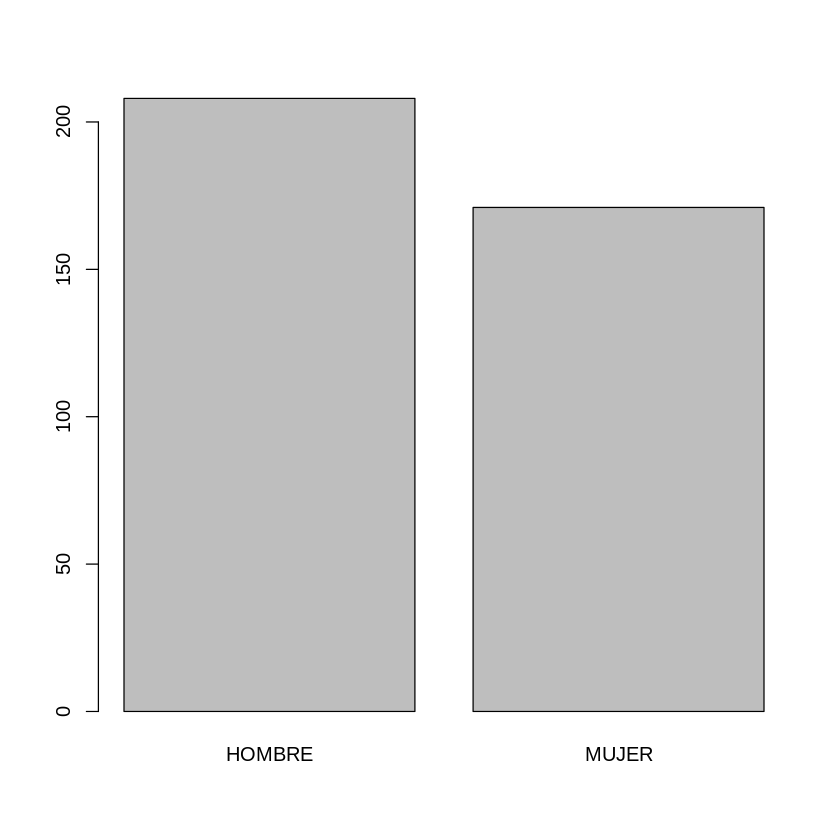

In [25]:
library(descr)
freq(mas.edades$SEXO_BIOLOGICO, plot = T)

Preparamos los datos para el cálculo del intervalo de confianza, en este caso vamos a seleccionar una categoría: `HOMBRE` en la distribución de `SEXO_BIOLOGICO`:

In [31]:
cat <- ifelse(mas.edades$SEXO_BIOLOGICO=="HOMBRE", 0, 1)
prop.table(table(cat))

cat
        0         1 
0.5488127 0.4511873 

In [32]:
p <- mean(cat)
p # Esta es la proporción de estudiantes hombres

[1] 0.4511873

In [0]:
n <- length(cat) # Tamaño de la muestra 
error.est.p <- sqrt((p*(1-p))/n) # Error estándar de la propoción
error.p <- 2 * error.est.p # Usamos Z = 2 para indicar un nivel de confianza del 95%
lim.inf.p <- p - error.p 
lim.sup.p <- p + error.p

In [34]:
result.p <- data.frame(p, n, error.est.p, error.p, lim.inf.p, lim.sup.p)
round(result.p,2)

p,n,error.est.p,error.p,lim.inf.p,lim.sup.p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.45,379,0.03,0.05,0.4,0.5


O usando la función `binconf` de la librería `Hmisc`:

In [35]:
library(Hmisc)
binconf(x = 171, n = 379)

Loading required package: lattice

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following object is masked from ‘package:survey’:

    deff


The following objects are masked from ‘package:base’:

    format.pval, units




,PointEst,Lower,Upper
,0.4511873,0.4018289,0.5015254


Gráficamente, ¿cómo lo podemos representar? Una opción es las gráficas de error

In [36]:
install.packages('plotrix')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



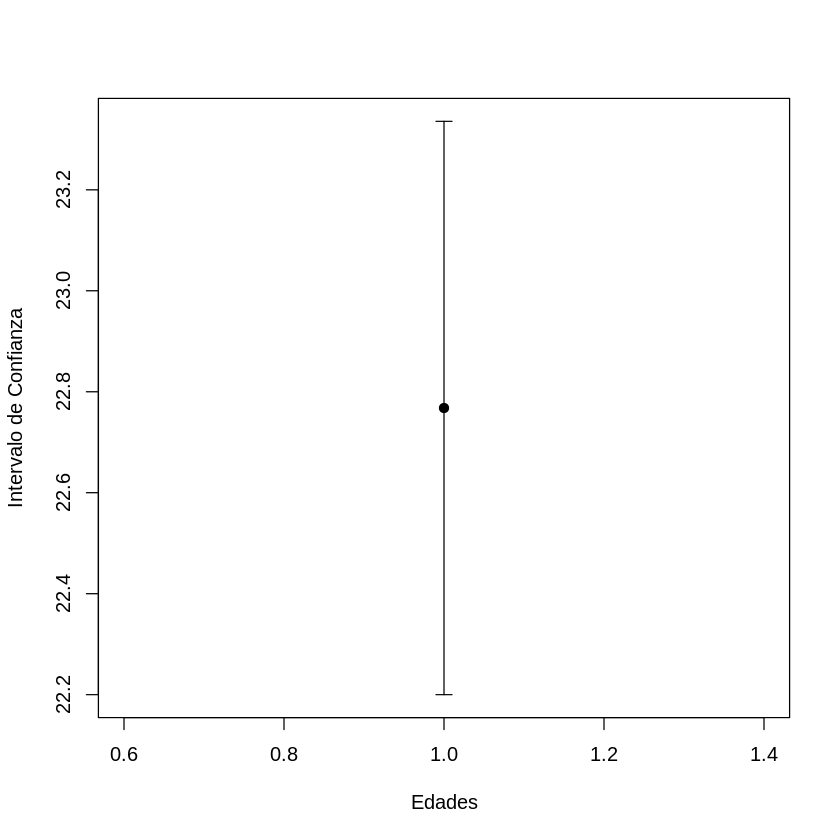

In [39]:
library(plotrix)
plotCI(mean(mas.edades$EDAD), ui = lim.sup, li = lim.inf, xlab = 'Edades', ylab = 'Intervalo de Confianza', pch = 19)

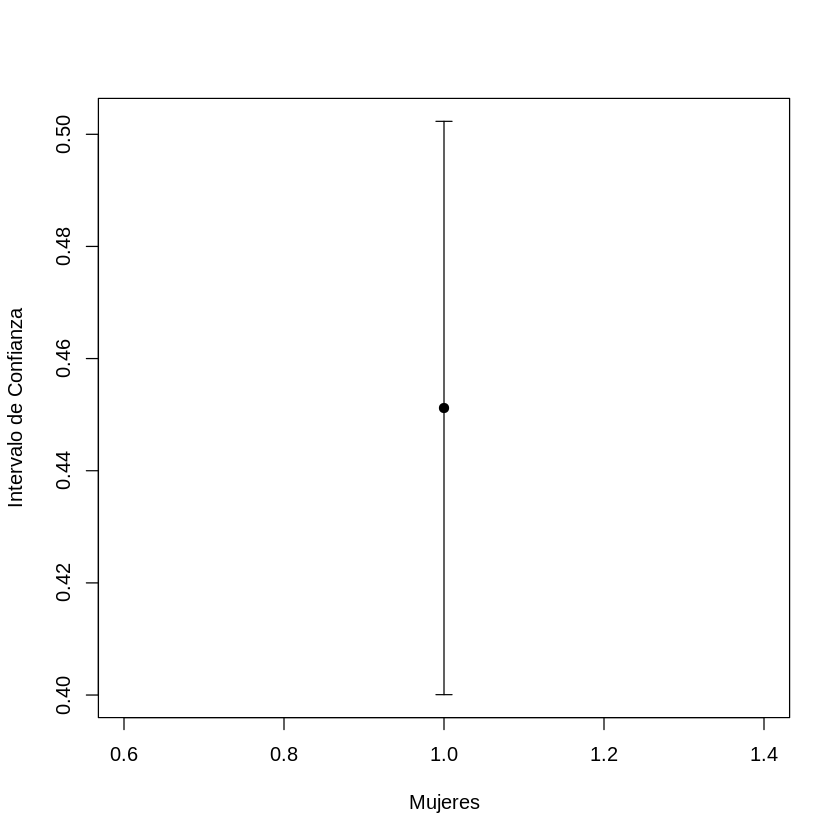

In [41]:
plotCI(mean(cat), ui = lim.sup.p, li = lim.inf.p, xlab = 'Mujeres', ylab = 'Intervalo de Confianza', pch = 19)